<a href="https://colab.research.google.com/github/LochanaBandara03/Intellihack_Neura_02/blob/main/Intellihack_Neura_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Customer Segmentation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df.shape

(999, 6)

In [ ]:
df.dtypes

total_purchases     float64
avg_cart_value      float64
total_time_spent    float64
product_click       float64
discount_counts     float64
customer_id          object
dtype: object

In [ ]:
df.describe()

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts
count,979.000000,979.000000,999.000000,979.000000,999.000000
mean,11.570991,75.457978,49.348759,28.237998,4.313313
std,7.016327,55.067835,32.730973,16.296384,4.532772
min,0.000000,10.260000,5.120000,4.000000,0.000000
25%,6.000000,33.130000,22.375000,16.000000,1.000000
50%,10.000000,49.380000,40.360000,21.000000,2.000000
75%,17.000000,121.255000,77.170000,45.000000,8.000000
max,32.000000,199.770000,119.820000,73.000000,21.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_purchases   979 non-null    float64
 1   avg_cart_value    979 non-null    float64
 2   total_time_spent  999 non-null    float64
 3   product_click     979 non-null    float64
 4   discount_counts   999 non-null    float64
 5   customer_id       999 non-null    object 
dtypes: float64(5), object(1)
memory usage: 47.0+ KB


In [ ]:
#Check for missing values
df.isnull().sum()

total_purchases     20
avg_cart_value      20
total_time_spent     0
product_click       20
discount_counts      0
customer_id          0
dtype: int64

In [ ]:
# Filling missing values with the median of the column
df.fillna(df.select_dtypes(include=[np.number]).median(), inplace=True)


In [ ]:
df.isnull().sum()

total_purchases     0
avg_cart_value      0
total_time_spent    0
product_click       0
discount_counts     0
customer_id         0
dtype: int64

### Exploratory Data Analysis

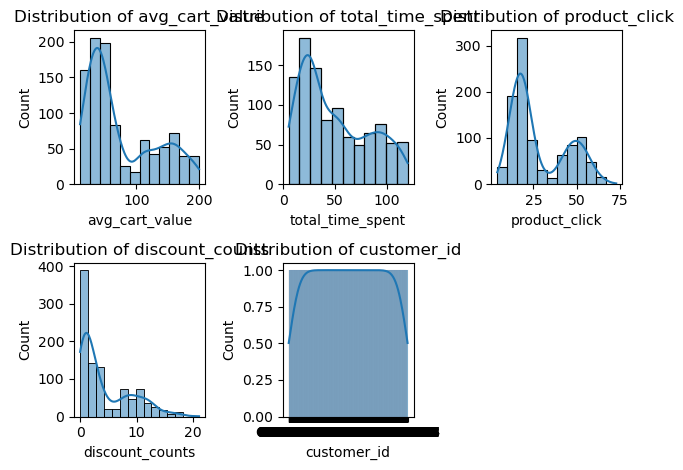

In [ ]:
#Histogram of the data
for i, column in enumerate(df.columns[1:]):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.savefig('distributions.png')
plt.show()

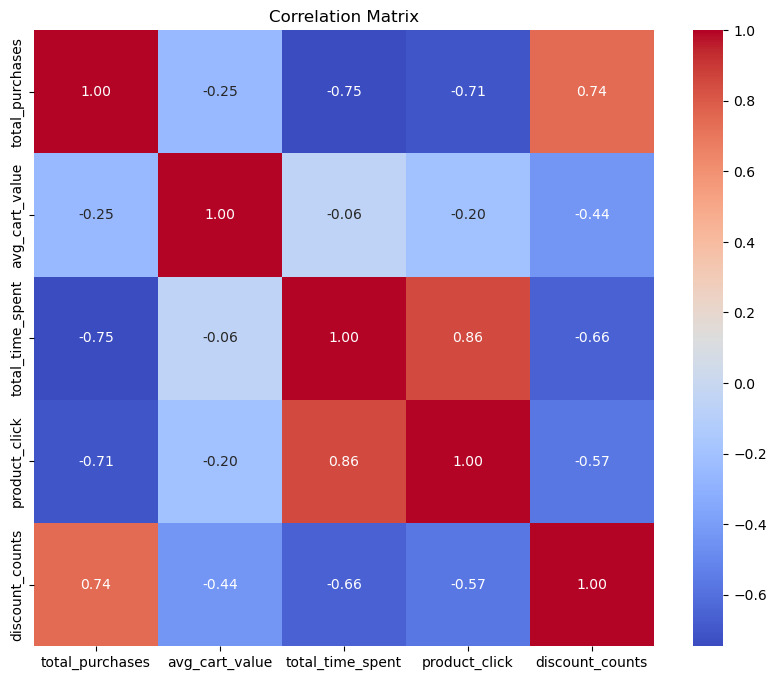

In [ ]:
#Correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = df.drop(columns=['customer_id']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.savefig('correlations.png')
plt.show()


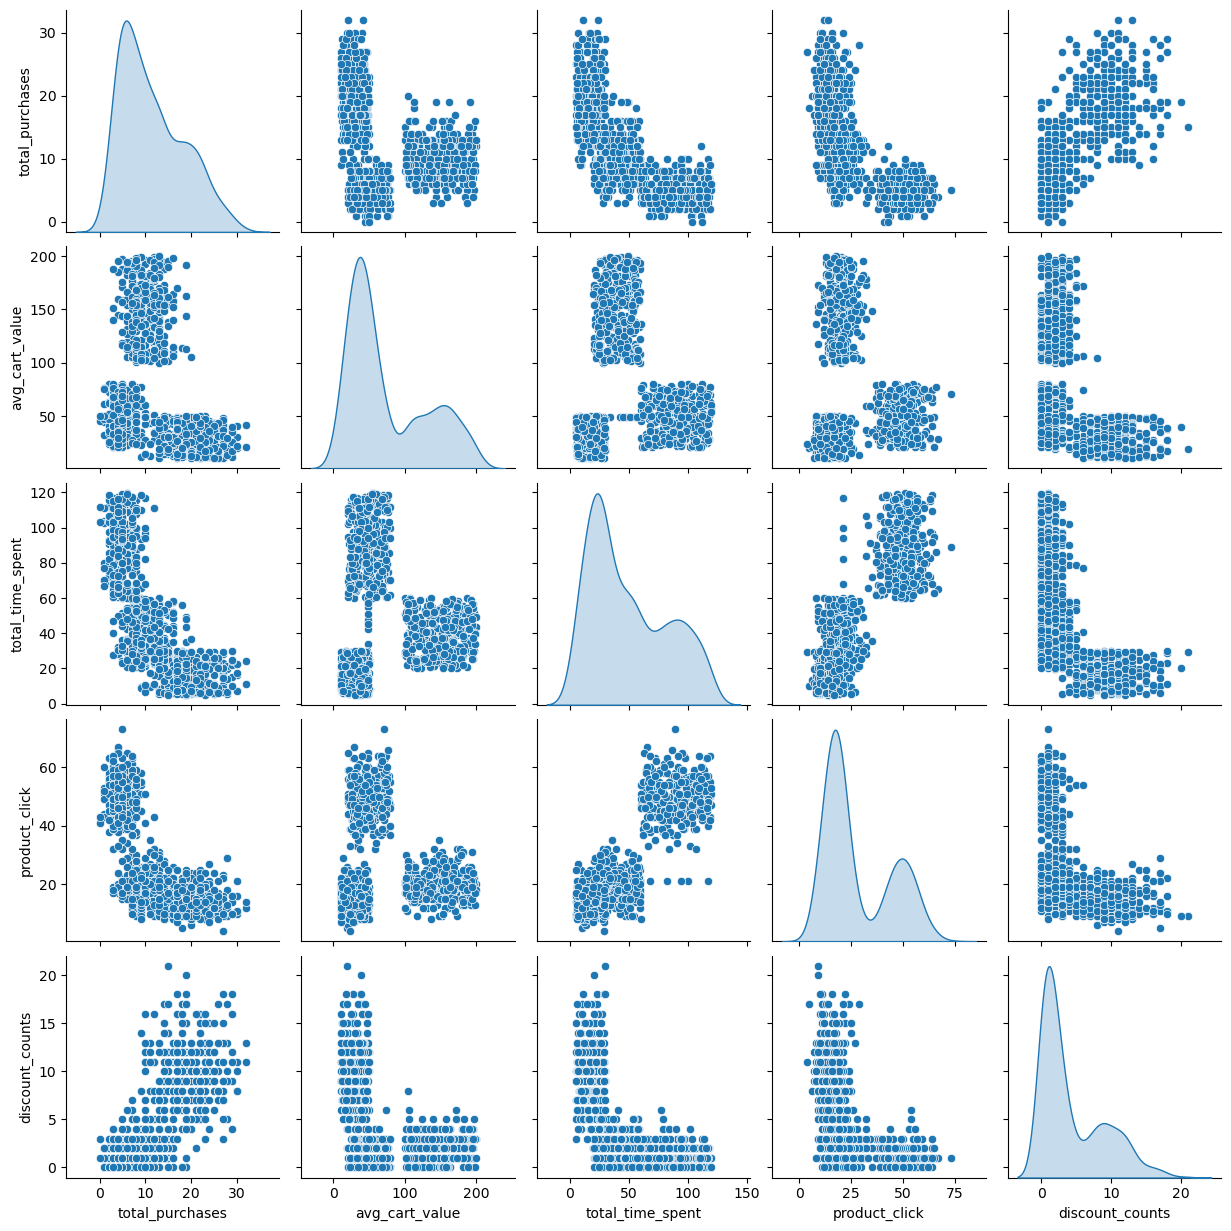

In [ ]:
#Pair plot
sns.pairplot(df.drop(columns=['customer_id']), diag_kind='kde')
plt.savefig('pairplot.png')
plt.show()

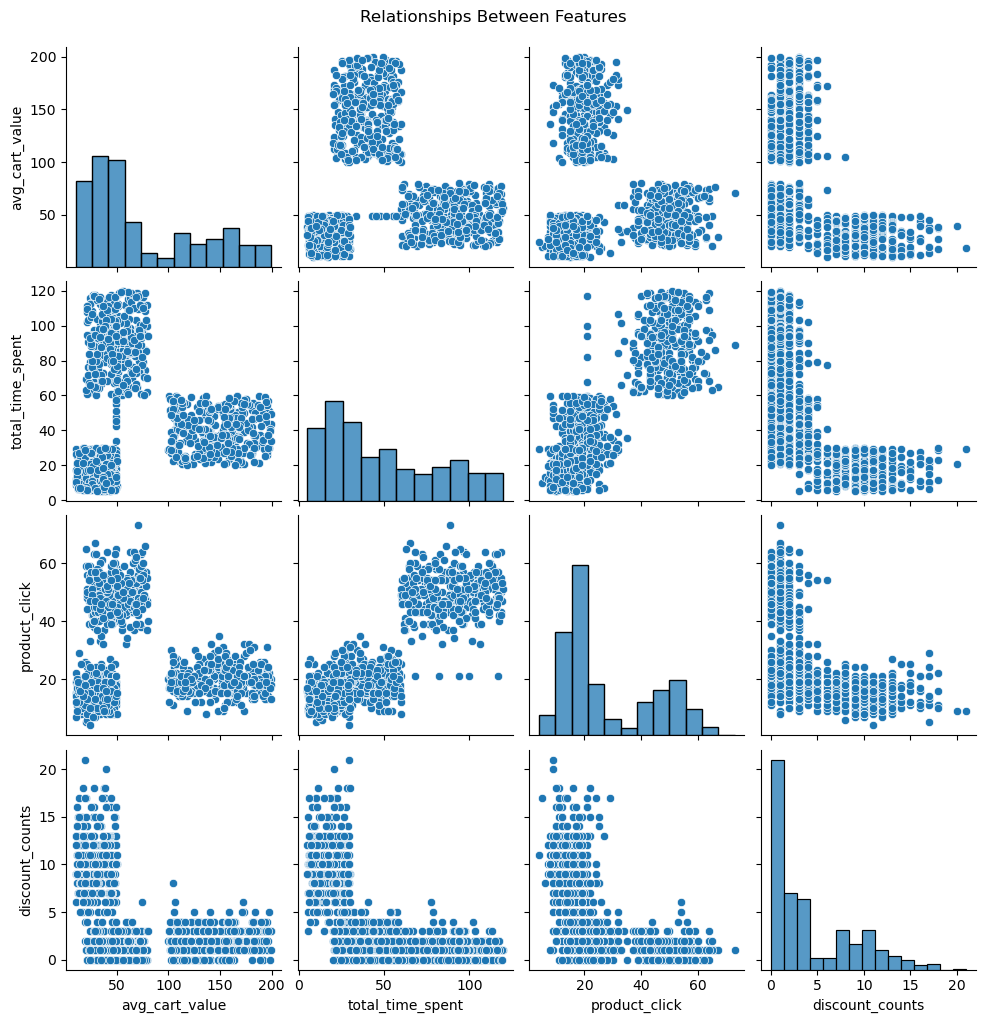

In [ ]:
#Relationship between the features
pairplot = sns.pairplot(df.iloc[:, 1:])
plt.suptitle('Relationships Between Features', y=1.02)
plt.savefig('relationships.png')
plt.show()


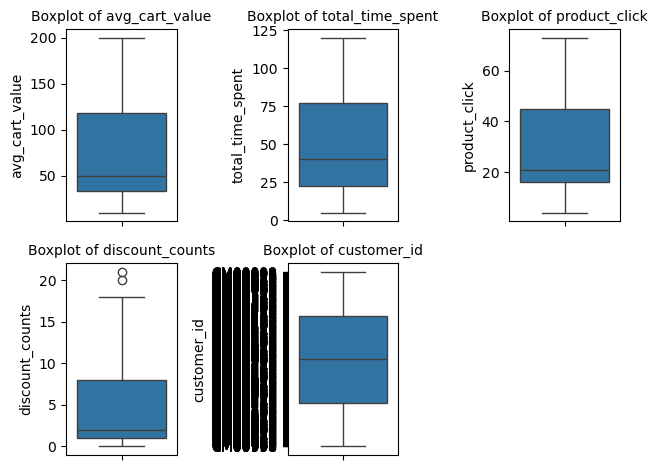

In [ ]:
#Boxplot of the data
for i, column in enumerate(df.columns[1:]):
    plt.subplot(2, 3, i+1)
    sns.boxplot(df[column])
    plt.title(f'Boxplot of {column}', fontsize=10)
plt.tight_layout()
plt.savefig('boxplots.png')
plt.show()

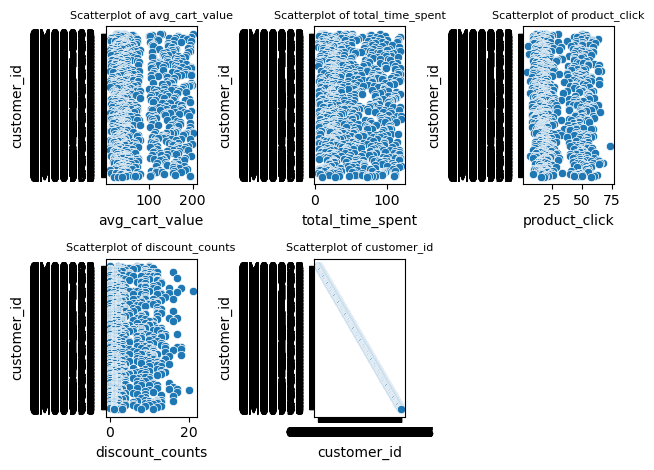

In [ ]:
#Scatter plot of the data
for i, column in enumerate(df.columns[1:]):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=df[column], y=df['customer_id'])
    plt.title(f'Scatterplot of {column}', fontsize=8)
plt.tight_layout()
plt.savefig('scatterplots.png')
plt.show()

### Data Preprocessing

In [ ]:
customer_id_new = df['customer_id']
features = df.drop(columns=['customer_id'])
features.head()

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts
0,7.0,129.34,52.17,18.0,0.0
1,22.0,24.18,9.19,15.0,7.0
2,2.0,32.18,90.69,50.0,2.0
3,25.0,26.85,11.22,16.0,10.0
4,7.0,125.45,34.19,30.0,3.0


In [ ]:
#Scaling the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# scaler = PowerTransformer()
# scaled_features = scaler.fit_transform(features)

# # scaler = RobustScaler()
# # scaled_features = scaler.fit_transform(features)

# # scaler = RobustScaler()
# # scaled_features = scaler.fit_transform(features)

# scaler = Normalizer()
# scaled_features = scaler.fit_transform(features)

scaled_df = pd.DataFrame(scaled_features, columns=features.columns)



In [ ]:
scaled_df.head()

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts
0,-0.653578,0.996261,0.086238,-0.624726,-0.952061
1,1.506039,-0.929454,-1.227549,-0.810415,0.593022
2,-1.373450,-0.782956,1.263694,1.355958,-0.510608
3,1.937962,-0.880561,-1.165497,-0.748519,1.255200
4,-0.653578,0.925027,-0.463364,0.118031,-0.289882


K Means Clustering Algorithm

In [ ]:
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)

    inertia.append(kmeans.inertia_)

    labels = kmeans.labels_
    silhouette_avg = silhouette_score(scaled_features, labels)
    silhouette_scores.append(silhouette_avg)

    print(f" k={k}: Inertia={kmeans.inertia_:.2f}, Silhouette Score={silhouette_avg:.4f}")

c:\Users\locha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\locha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\locha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\locha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

 k=2: Inertia=2432.75, Silhouette Score=0.4902
 k=3: Inertia=884.58, Silhouette Score=0.6125
 k=4: Inertia=778.82, Silhouette Score=0.4991
 k=5: Inertia=700.34, Silhouette Score=0.3723
 k=6: Inertia=638.50, Silhouette Score=0.2497


c:\Users\locha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\locha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\locha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\locha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

 k=7: Inertia=571.14, Silhouette Score=0.2450
 k=8: Inertia=540.49, Silhouette Score=0.2406
 k=9: Inertia=507.16, Silhouette Score=0.2330
 k=10: Inertia=480.29, Silhouette Score=0.2181


c:\Users\locha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


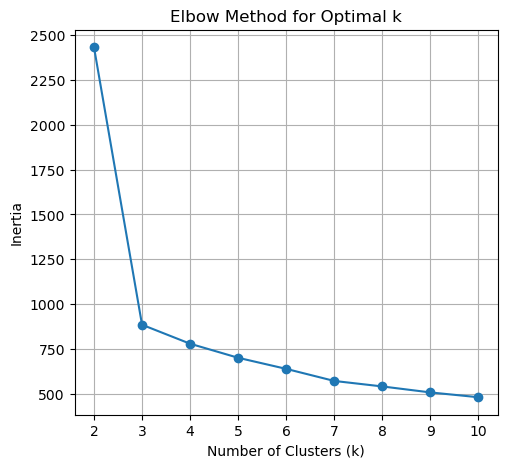

In [ ]:
#Plotting the inertia
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.savefig('elbow.png')
plt.show()

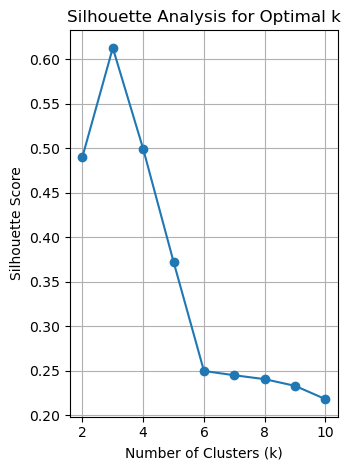

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.grid(True)
plt.tight_layout()
plt.savefig('cluster_evaluate.png')
plt.show()

In [ ]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(scaled_features)
cluster_labels = kmeans.labels_

# Add cluster labels to original data
df_with_clusters = df.copy()
df_with_clusters['cluster'] = cluster_labels

c:\Users\locha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


### Model Evaluation

In [ ]:
silhouette_avg = silhouette_score(scaled_features, cluster_labels)
print("Final Model Evaluation:")
print(f"Number of clusters: {k}")
print(f"Silhouette Score: {silhouette_avg:.4f}")
print(f"Inertia: {kmeans.inertia_:.2f}")

Final Model Evaluation:
Number of clusters: 3
Silhouette Score: 0.6125
Inertia: 884.58


Standard scaler - 0.6125

MinMax scaler - 0.6118

Rebust scaler - 0.6118

Noramalizer - 0.5861

Power Transformer - 0.5403

In [ ]:
#Cluster Centers
centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers = pd.DataFrame(centers, columns=features.columns)
print("Cluster Centers (Original Scale):")
print(cluster_centers)

Cluster Centers (Original Scale):
   total_purchases  avg_cart_value  total_time_spent  product_click  \
0        10.170659      144.687874         40.472126      19.925150   
1         4.924699       49.034066         90.211837      49.370482   
2        19.507508       30.798498         17.511682      15.072072   

   discount_counts  
0         1.940120  
1         1.027108  
2         9.969970  


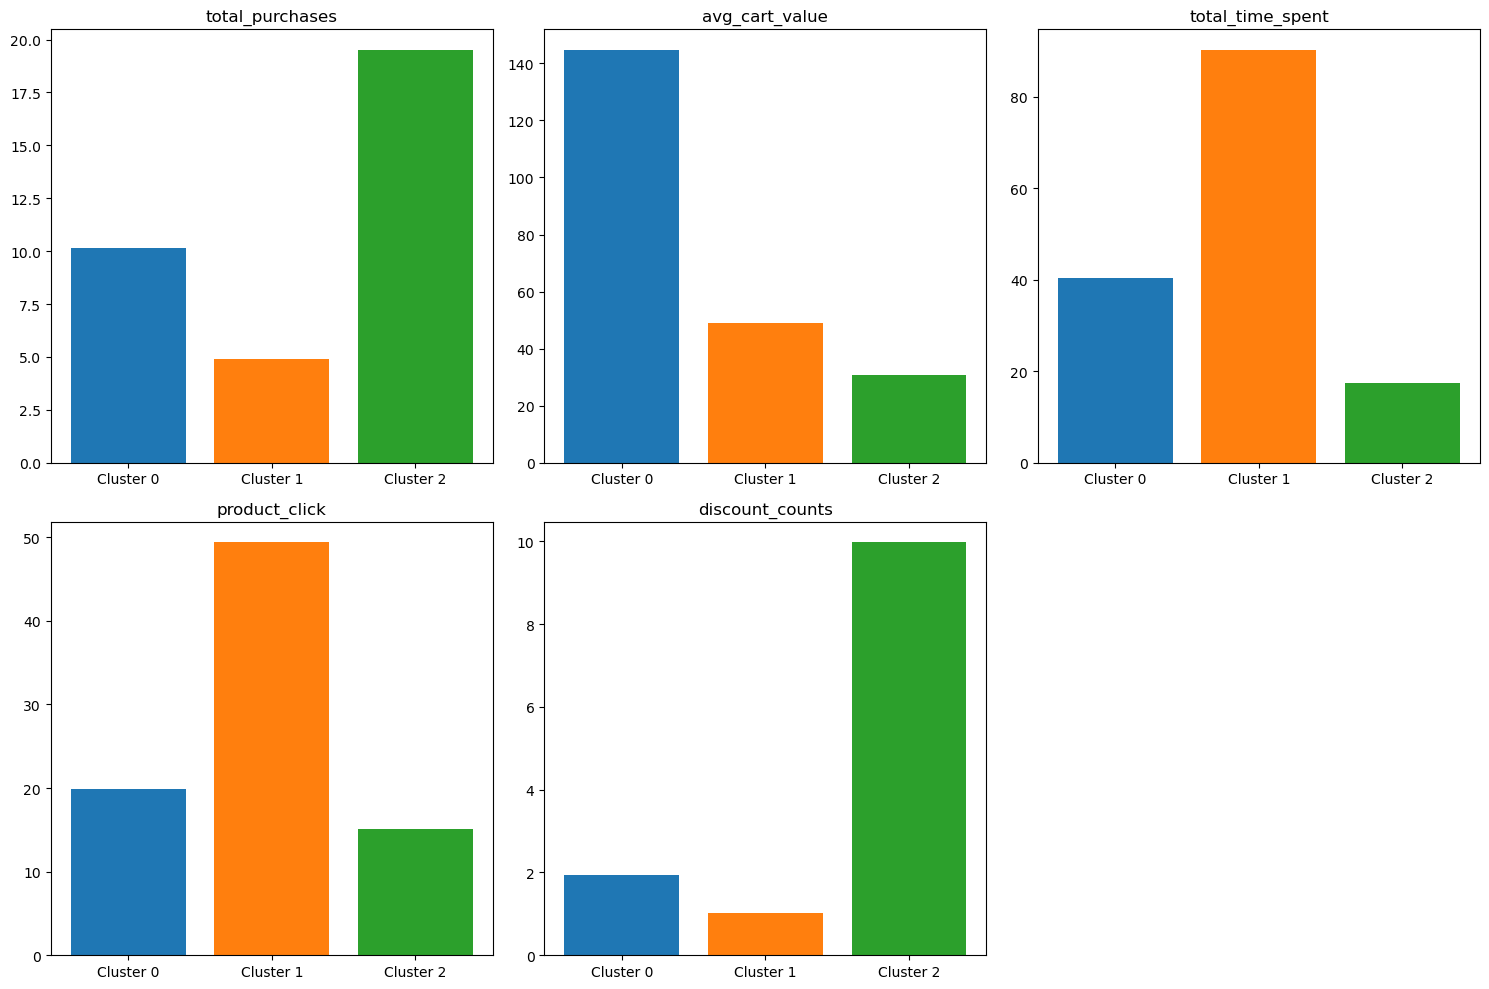

In [ ]:
#Cluster Profiles
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features.columns):
    plt.subplot(2, 3, i+1)
    for cluster in range(k):
        plt.bar(cluster, cluster_centers.iloc[cluster][feature])
    plt.title(feature)
    plt.xticks(range(k), [f'Cluster {i}' for i in range(k)])
plt.tight_layout()
plt.savefig('cluster_prof.png')
plt.show()

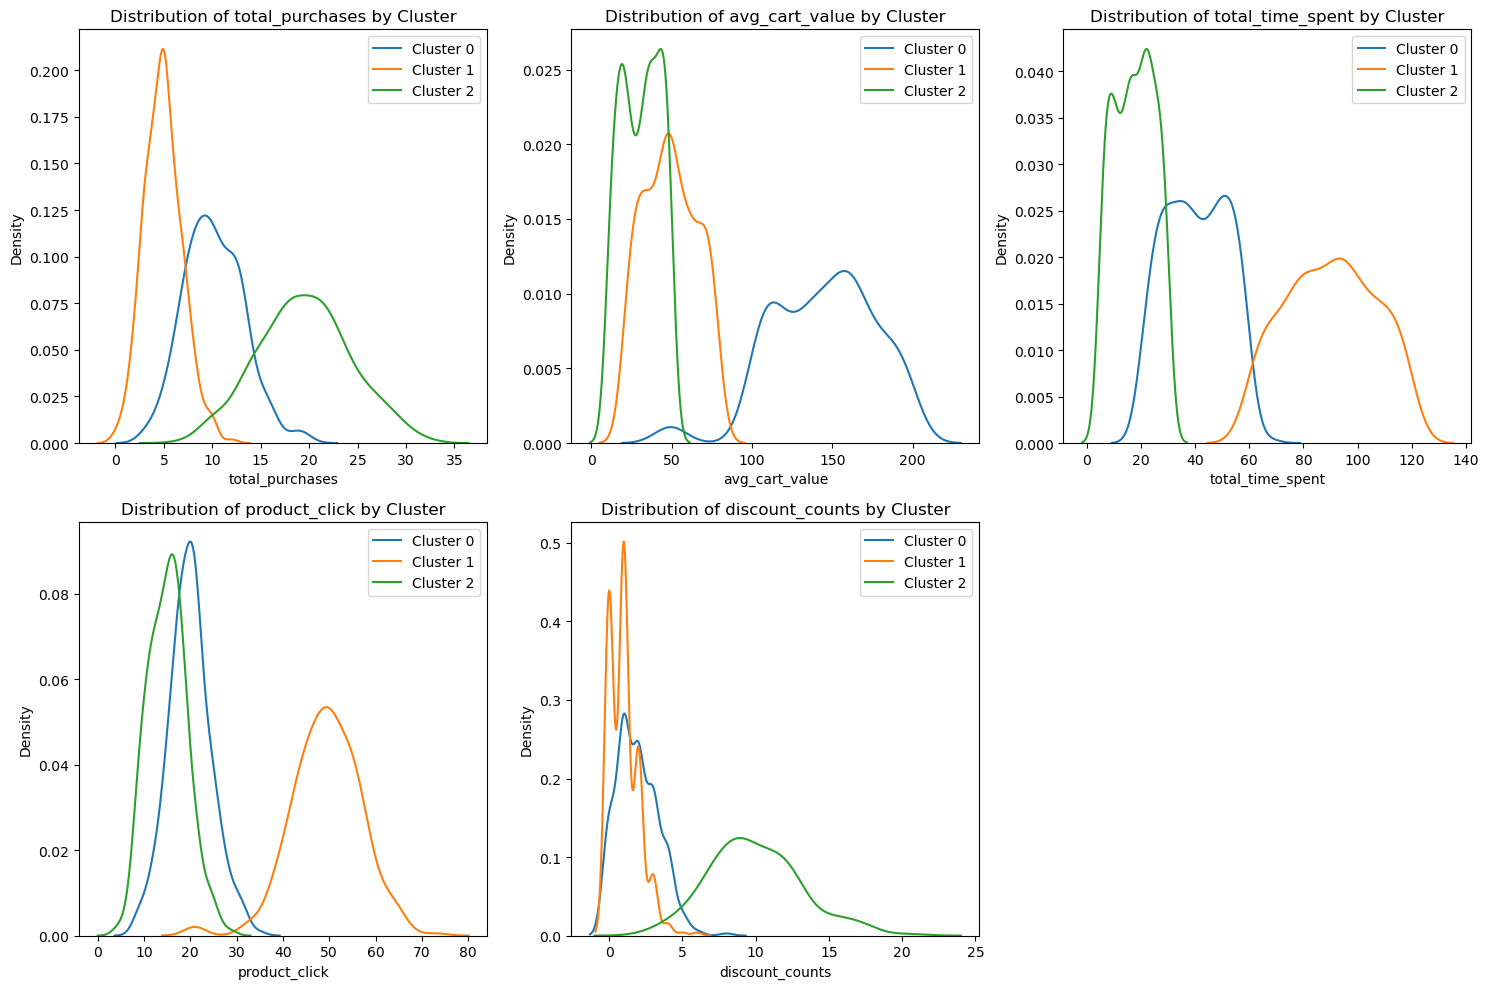

In [ ]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features.columns):
    plt.subplot(2, 3, i+1)
    for cluster in range(k):
        subset = df_with_clusters[df_with_clusters['cluster'] == cluster]
        sns.kdeplot(subset[feature], label=f'Cluster {cluster}')
    plt.title(f'Distribution of {feature} by Cluster')
    plt.legend()
plt.tight_layout()
plt.savefig('distributions_cluster.png')
plt.show()

In [ ]:
# Calculate statistics by cluster
cluster_stats = df_with_clusters.groupby('cluster').agg({
    'total_purchases': ['mean', 'median'],
    'avg_cart_value': ['mean', 'median'],
    'total_time_spent': ['mean', 'median'],
    'product_click': ['mean', 'median'],
    'discount_counts': ['mean', 'median'],
    'customer_id': 'count'  # Count of customers in each cluster
}).round(2)

In [ ]:
# Rename the count column for clarity
cluster_stats.columns = cluster_stats.columns.map(lambda x: 'count' if x[1] == 'count' else f'{x[0]}_{x[1]}')
print("\nCluster Statistics:")
print(cluster_stats)


Cluster Statistics:
         total_purchases_mean  total_purchases_median  avg_cart_value_mean  \
cluster                                                                      
0                       10.17                    10.0               144.69   
1                        4.92                     5.0                49.03   
2                       19.51                    19.0                30.80   

         avg_cart_value_median  total_time_spent_mean  \
cluster                                                 
0                       147.71                  40.47   
1                        48.72                  90.21   
2                        31.67                  17.51   

         total_time_spent_median  product_click_mean  product_click_median  \
cluster                                                                      
0                          40.39               19.93                  20.0   
1                          90.82               49.37                

In [ ]:
# PCA for Visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['cluster'] = cluster_labels

In [ ]:
explained_variance = pca.explained_variance_ratio_
print(f"\nExplained Variance by PCA components: {explained_variance[0]:.4f}, {explained_variance[1]:.4f}")
print(f"Total Explained Variance: {sum(explained_variance):.4f}")


Explained Variance by PCA components: 0.6333, 0.2594
Total Explained Variance: 0.8926


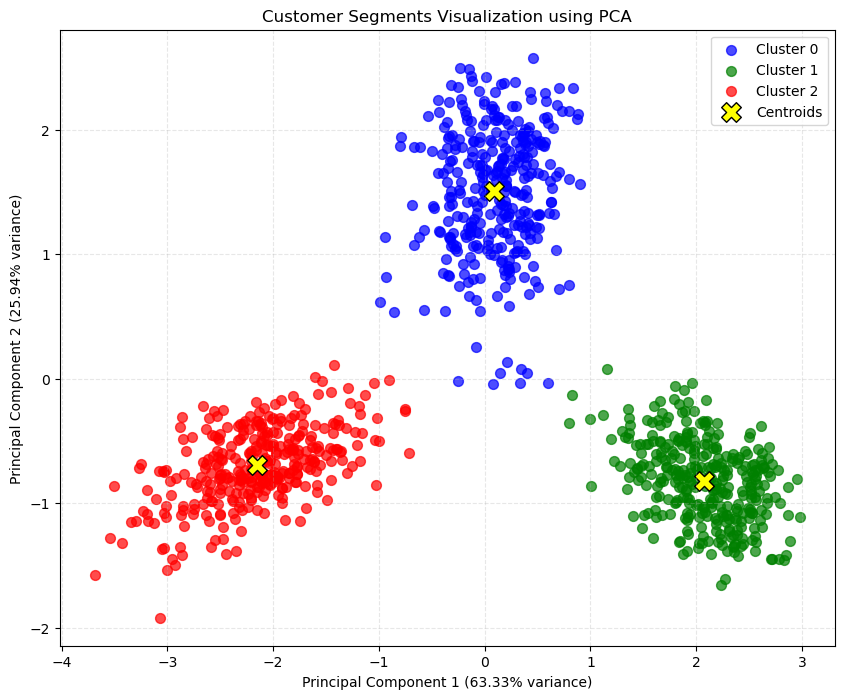

In [ ]:
# Visualize clusters with PCA
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red']
for cluster in range(k):
    points = pca_df[pca_df['cluster'] == cluster]
    plt.scatter(points['PC1'], points['PC2'], s=50, c=colors[cluster],
                label=f'Cluster {cluster}', alpha=0.7)

# Add cluster centers to the plot
centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], s=200, c='yellow',
            marker='X', edgecolor='black', label='Centroids')

plt.title('Customer Segments Visualization using PCA')
plt.xlabel(f'Principal Component 1 ({explained_variance[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]:.2%} variance)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.savefig('clusters_PCA.png')
plt.show()

In [ ]:
# Match clusters to the predefined segments based on cluster centers
# Define the expected characteristics for each segment
segments = {
    'Bargain Hunters': {
        'total_purchases': 'High',
        'avg_cart_value': 'Low',
        'total_time_spent': 'Moderate',
        'product_click': 'Moderate',
        'discount_count': 'High'
    },
    'High Spenders': {
        'total_purchases': 'Moderate',
        'avg_cart_value': 'High',
        'total_time_spent': 'Moderate',
        'product_click': 'Moderate',
        'discount_count': 'Low'
    },
    'Window Shoppers': {
        'total_purchases': 'Low',
        'avg_cart_value': 'Moderate',
        'total_time_spent': 'High',
        'product_click': 'High',
        'discount_count': 'Low'
    }
}

In [ ]:
# Function to categorize a value as Low, Moderate, or High based on its position in the range
def categorize(value, min_val, max_val):
    third = (max_val - min_val) / 3
    if value < min_val + third:
        return 'Low'
    elif value > max_val - third:
        return 'High'
    else:
        return 'Moderate'

In [ ]:
# Get min and max for each feature across all clusters
feature_ranges = {}
for feature in features.columns:
    feature_ranges[feature] = (cluster_centers[feature].min(), cluster_centers[feature].max())

# Categorize each feature for each cluster
cluster_categories = {}
for cluster in range(k):
    cluster_categories[cluster] = {}
    for feature in features.columns:
        value = cluster_centers.iloc[cluster][feature]
        min_val, max_val = feature_ranges[feature]
        category = categorize(value, min_val, max_val)
        cluster_categories[cluster][feature] = category

In [ ]:
# Match clusters to segments
segment_matches = {}
for cluster in range(k):
    scores = {}
    for segment, characteristics in segments.items():
        score = sum(1 for feature in features.columns
                   if cluster_categories[cluster][feature] == characteristics.get(feature, characteristics.get('discount_count')))
        scores[segment] = score
    best_match = max(scores, key=scores.get)
    match_quality = scores[best_match] / len(features.columns)
    segment_matches[cluster] = (best_match, match_quality)

print("\nCluster to Segment Matching:")
for cluster, (segment, quality) in segment_matches.items():
    print(f"\nCluster {cluster} : {segment} (Match quality: {quality:.2%})")
    for feature in features.columns:
        expected_feature = 'discount_count' if feature == 'discount_counts' else feature
        print(f"  {feature}: {cluster_categories[cluster][feature]} (Expected: {segments[segment][expected_feature]})")


Cluster to Segment Matching:

Cluster 0 : High Spenders (Match quality: 60.00%)
  total_purchases: Moderate (Expected: Moderate)
  avg_cart_value: High (Expected: High)
  total_time_spent: Low (Expected: Moderate)
  product_click: Low (Expected: Moderate)
  discount_counts: Low (Expected: Low)

Cluster 1 : Window Shoppers (Match quality: 80.00%)
  total_purchases: Low (Expected: Low)
  avg_cart_value: Low (Expected: Moderate)
  total_time_spent: High (Expected: High)
  product_click: High (Expected: High)
  discount_counts: Low (Expected: Low)

Cluster 2 : Bargain Hunters (Match quality: 60.00%)
  total_purchases: High (Expected: High)
  avg_cart_value: Low (Expected: Low)
  total_time_spent: Low (Expected: Moderate)
  product_click: Low (Expected: Moderate)
  discount_counts: High (Expected: High)


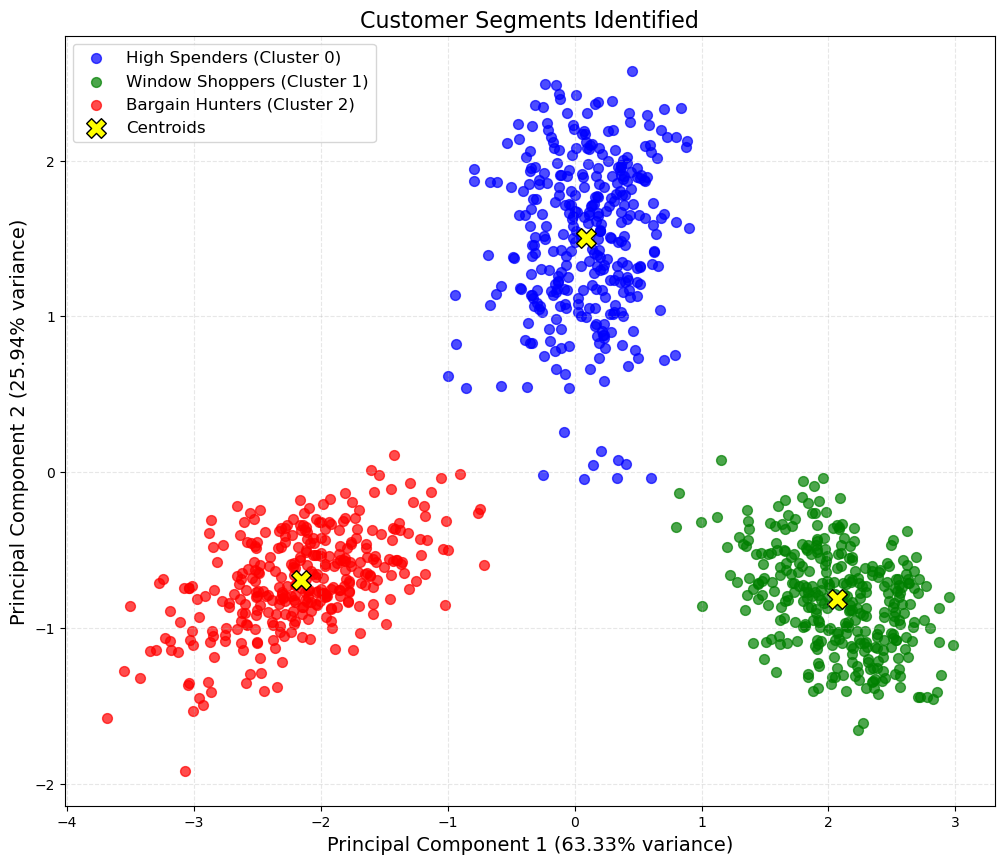

In [ ]:
#Final visualization
plt.figure(figsize=(12, 10))
for cluster in range(k):
    segment, _ = segment_matches[cluster]
    points = pca_df[pca_df['cluster'] == cluster]
    plt.scatter(points['PC1'], points['PC2'], s=50, c=colors[cluster],
                label=f'{segment} (Cluster {cluster})', alpha=0.7)

plt.scatter(centers_pca[:, 0], centers_pca[:, 1], s=200, c='yellow',
            marker='X', edgecolor='black', label='Centroids')

plt.title('Customer Segments Identified', fontsize=16)
plt.xlabel(f'Principal Component 1 ({explained_variance[0]:.2%} variance)', fontsize=14)
plt.ylabel(f'Principal Component 2 ({explained_variance[1]:.2%} variance)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.savefig('final.png')
plt.show()

In [ ]:
#Create a final table
final_results = pd.DataFrame({
    'Cluster': range(k),
    'Segment': [segment_matches[i][0] for i in range(k)],
    'Match Quality': [segment_matches[i][1] for i in range(k)],
    'Customer Count': [sum(cluster_labels == i) for i in range(k)],
    'Customer Percentage': [(sum(cluster_labels == i) / len(df) * 100).round(2) for i in range(k)]
})

print("\nFinal Cluster to Segment Mapping:")
print(final_results)


Final Cluster to Segment Mapping:
   Cluster          Segment  Match Quality  Customer Count  \
0        0    High Spenders            0.6             334   
1        1  Window Shoppers            0.8             332   
2        2  Bargain Hunters            0.6             333   

   Customer Percentage  
0                33.43  
1                33.23  
2                33.33  


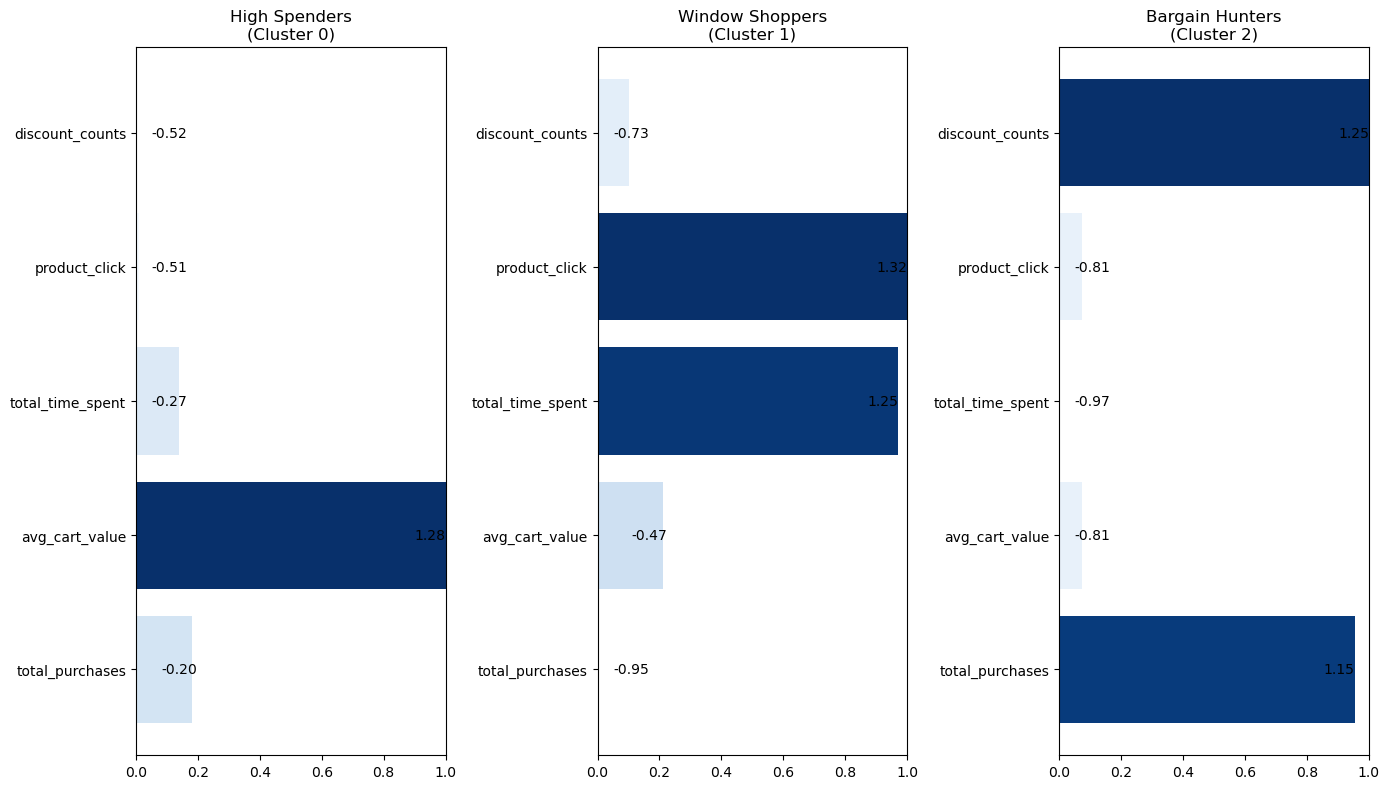

In [ ]:
#Generate feature importance visualization
plt.figure(figsize=(14, 8))
for cluster in range(k):
    plt.subplot(1, k, cluster+1)

    center = kmeans.cluster_centers_[cluster]
    normalized_center = (center - center.min()) / (center.max() - center.min())

    colors = plt.cm.Blues(normalized_center)
    bars = plt.barh(features.columns, normalized_center, color=colors)

    plt.title(f'{segment_matches[cluster][0]}\n(Cluster {cluster})')
    plt.xlim(0, 1)

    #Add value annotations
    for bar, value in zip(bars, center):
        plt.text(max(0.05, min(bar.get_width() - 0.1, 0.9)),
                 bar.get_y() + bar.get_height()/2,
                 f'{value:.2f}',
                 va='center')

plt.tight_layout()
plt.savefig('cluster_feature_final.png')
plt.show()